In [1021]:
import tifffile as tf 
import zarr 
import palom
# import pillow
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.spatial import ConvexHull, Delaunay
import pickle
import os
import time
# import torch
# import torch.nn as nn
from tqdm.auto import tqdm
import numpy as np
import tifffile as tf
import zarr
import dask.array as da
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import cellcutter
import cellcutter.cli
from numcodecs import Blosc
# import logging
# logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
# logging.debug("test")

In [1022]:
# # old_df = pd.read_csv('/Users/swarchol/Downloads/seal480/objects.csv')
# # old_df
# df = pd.read_csv('/Users/swarchol/Research/seal/data/astro/updated_astro_merged.csv')

In [1023]:
CSV_PATH = '/Users/swarchol/Research/seal/data/astro/updated_astro_merged.csv'

In [1024]:
# CSV_PATH = '/Users/swarchol/Research/seal/data/astro/updated_astro_merged.csv'
# merged_df.to_csv('/Users/swarchol/Research/seal/data/astro/updated_astro_merged.csv', index=False)


MainProcess 2025-03-30 17:32:22,899 WARNING: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.22045898..266.5].


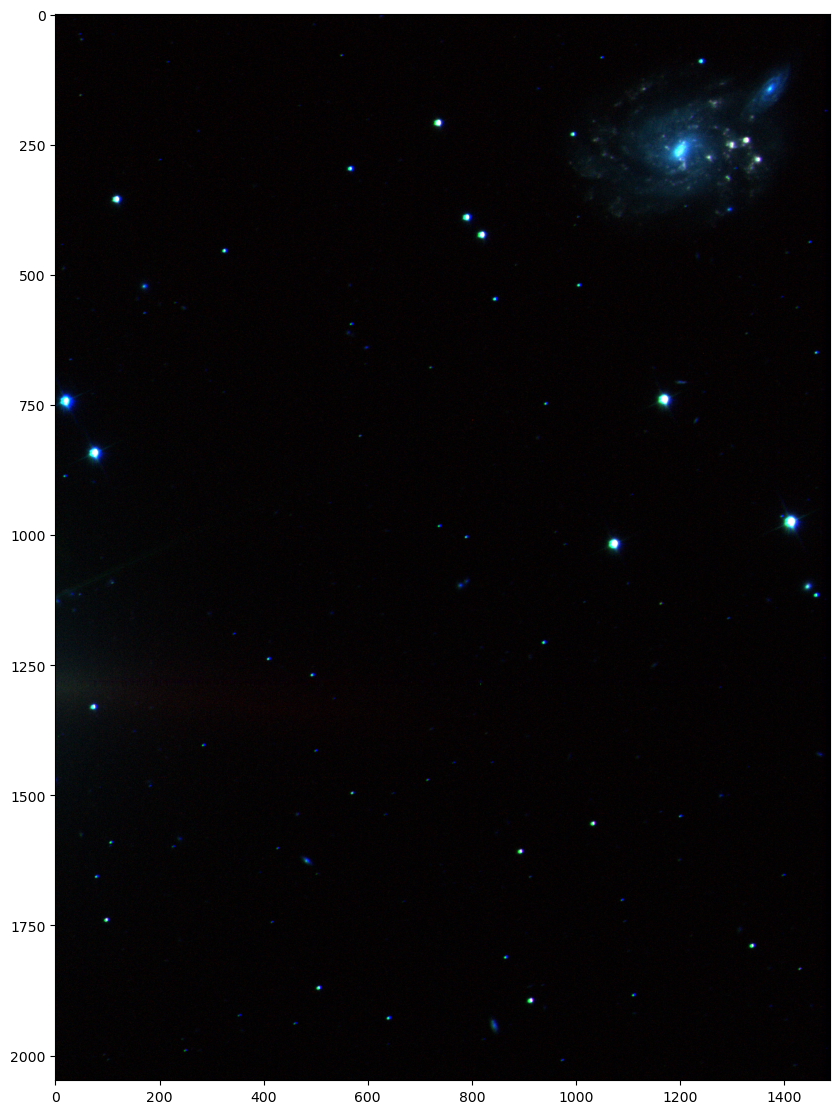

In [1025]:

df = pd.read_csv(CSV_PATH)
features = df
# load numpy arrays and stack them
image_channels = np.stack([np.load(f'/Users/swarchol/Downloads/seal480/filter-{feature}.npy') for feature in ['u', 'g', 'r', 'i', 'z']])
fig, axs = plt.subplots(1, 1, figsize=(10, 20))
# visualize first 3 channels as rgb
first_3_channels = image_channels[0:3, :, :]
# flip so channels are last
first_3_channels = np.transpose(first_3_channels, (1, 2, 0))
axs.imshow(first_3_channels)

# sdss_df = pd.read_csv('/Users/swarchol/sdss_results.csv')

In [1026]:
# df = pd.read_csv(CSV_PATH)
# old_df = pd.read_csv('/Users/swarchol/Downloads/seal480/objects.csv')

# # df.to_csv('/Users/swarchol/Research/seal/data/astro/updated_astro_merged.csv', index=False)


In [1027]:
# df[df['objid'] == 1237666338116273022]

(array([8.375538e+06, 1.331296e+06, 1.121763e+06, 8.706460e+05,
        6.087070e+05, 6.250270e+05, 3.202200e+05, 2.634450e+05,
        2.292490e+05, 1.657880e+05, 1.303130e+05, 1.299260e+05,
        1.024370e+05, 7.006500e+04, 7.527300e+04, 8.222800e+04,
        5.031500e+04, 4.569900e+04, 7.146200e+04, 4.009200e+04,
        3.138000e+04, 6.001300e+04, 3.217800e+04, 2.595800e+04,
        4.318400e+04, 2.883600e+04, 1.904200e+04, 3.110600e+04,
        2.373700e+04, 1.491800e+04, 1.769200e+04, 2.431300e+04,
        1.108300e+04, 1.125400e+04, 1.989000e+04, 8.309000e+03,
        7.612000e+03, 1.440300e+04, 6.395000e+03, 5.239000e+03,
        1.028300e+04, 5.035000e+03, 3.290000e+03, 7.866000e+03,
        4.396000e+03, 2.511000e+03, 3.682000e+03, 5.169000e+03,
        1.626000e+03, 2.527000e+03, 4.199000e+03, 1.402000e+03,
        1.529000e+03, 3.164000e+03, 1.158000e+03, 9.470000e+02,
        2.810000e+03, 8.090000e+02, 7.380000e+02, 2.080000e+03,
        8.480000e+02, 5.180000e+02, 1.18

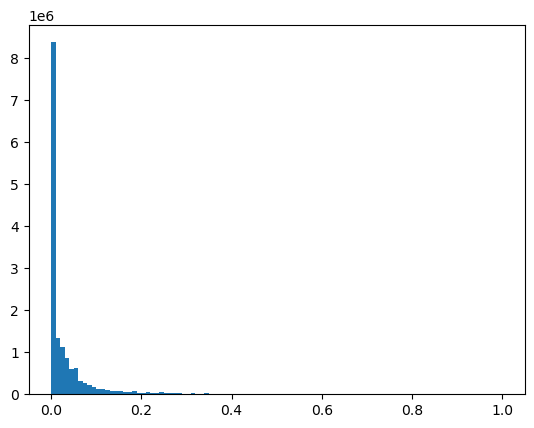

In [1028]:
# plt.hist(image_channels.flatten(), bins=100)
image_channels = np.clip(image_channels, 0, 1)
plt.hist(image_channels.flatten(), bins=100)

In [1029]:
# Clip values to 0-255
image_channels = np.clip(image_channels, 0, 1)
float_image_channels = image_channels.astype(np.float32)

In [1030]:
first_3_channels.mean()


0.013255507

In [1031]:
# df
# # Check for quantitative columns in df
# # Iterate through all columns and identify which ones are continuous and which ones are categorical,
# # 
continuous_columns = []
for col in df.columns:
    if df[col].dtype == 'float64' :
        continuous_columns.append(col)

# Print the unique dtypes of columns in df
len(continuous_columns)
# Print the dtypes of columns in sdss_df


472

In [1032]:

continuous_columns = [col for col in continuous_columns if col not in ['objid', 'ra', 'dec', 'RA', 'DEC', 'objID',
 'flags',
 'rowc',
 'rowcErr',
 'colc',
 'colcErr',
 'rowv',
 'rowvErr',
 'colv',
 'colvErr',
 'rowc_u',
 'rowc_g',
 'rowc_r',
 'rowc_i',
 'Err_u',
 'Err_g',
 'Err_r',
 'Err_i',
 'Err_z',
 'rowcErr_u',
 'rowcErr_g',
 'rowcErr_r',
 'rowcErr_i',
 'rowcErr_z',
 'colc_u',
 'colc_g',
 'colc_r',
 'colc_i',
 'colc_z',
 'colcErr_u',
  'rowc_z',
 'sky_u',
 'sky_g',
 'sky_r',
 'sky_i',
 'sky_z',
 'skyIvar_u',
 'skyIvar_g',
 'skyIvar_r',
 'skyIvar_i',
 'skyIvar_z',
 'colcErr_g',
 'htmID',
 'fieldID',
 'parentID',
 'specObjID',
 'u.1',
 'g.1',
 'r.1',
 'i.1',
 'z.1',
 'err_u',
 'err_g',
 'err_r',
 'err_i',
 'err_z',
 'dered_u',
 'dered_g',
 'dered_r',
 'dered_i',
 'dered_z',
 'score',
 'colcErr_r',
 'colcErr_i',
 'colcErr_z',
  'objid.2'
 'rowc_z',]]

In [1033]:
# continuous_columns

In [1034]:
# continuous_columns

In [1035]:
# df.to_csv('/Users/swarchol/Research/seal/data/astro/updated_astro_merged.csv', index=False)

In [1036]:
# from astroquery.sdss import SDSS
# import astropy.units as u
# def query_sdss_specobj_obj_by_objid(objid):
#     query = f"SELECT * FROM PhotoObj WHERE objid = {objid}"
#     print("Executing query:", query)
#     result = SDSS.query_sql(query)
    
#     if result is not None:
#         print("Query succeeded. Result:")
#         print(result)
#     else:
#         print("No results found for objid =", objid)
#     return result

# spec_results = []

# # Assuming df is already loaded and contains 'objid'
# for objid in tqdm(df['objid']):
#     objid_int = int(objid)
#     result = query_sdss_specobj_obj_by_objid(objid_int)
#     if result is not None:
#         spec_results.append(result.to_pandas())  # convert to DataFrame



In [1037]:
# # Spec results is a list of dataframes, merge them into a single dataframe
# spec_results_df = pd.concat(spec_results)
# spec_results_df.to_csv('/Users/swarchol/Research/seal/data/astro/spec_results_final.csv', index=False)


In [1038]:
# spec_results_df

In [1039]:
# # Merge the columns of spec_results_df into df on objid == objID
# # The issue is that we're getting duplicate rows because there might be multiple matches
# # Let's check the shape before and after merging
# print(f"Original df shape: {df.shape}")
# print(f"spec_results_df shape: {spec_results_df.shape}")

# # Create a new objid column in spec_results_df to match with df
# spec_results_df['objid'] = spec_results_df['objID']

# # Use drop_duplicates on spec_results_df to ensure we have only one row per objid
# spec_results_df_unique = spec_results_df.drop_duplicates(subset=['objid'])
# print(f"spec_results_df after drop_duplicates: {spec_results_df_unique.shape}")

# # Now merge with the deduplicated dataframe
# merged_df = df.merge(spec_results_df_unique, on='objid', how='left')
# print(f"Merged df shape: {merged_df.shape}")

# # Verify the result has the expected number of rows
# merged_df_unique = merged_df.drop_duplicates(subset=['objid'])
# print(f"Merged df after drop_duplicates: {merged_df_unique.shape}")




In [1040]:
# spec_results_df.shape
# df.shape

In [1041]:
# # concat columns of spec_results_df into df on objid == objID
# # sort both by objid
# df = df.sort_values(by='objid')
# spec_results_df = spec_results_df.sort_values(by='objid')
# df = df.sort_values(by='objid')
# # reset the index of both dataframes
# df = df.reset_index(drop=True)
# spec_results_df = spec_results_df.reset_index(drop=True)
# # concat the two dataframes horizontally


# merged_df = pd.concat([df, spec_results_df], axis=1)
# merged_df.to_csv('/Users/swarchol/Research/seal/data/astro/updated_astro_merged.csv', index=False)
# # merged_df

In [1042]:
# merged_df['temp_index']

In [1043]:
# # Merge all tables in results into a single table
# from astropy.table import vstack

# # Filter out None values from results
# valid_results = [r for r in results if r is not None]

# if valid_results:
#     # Merge all tables into a single table
#     merged_table = vstack(valid_results)
#     merged_table
# else:
#     print("No valid results found to merge")

In [1044]:
# merged_table_pd = merged_table.to_pandas()
# merged_table_pd
# merged_table_pd.to_csv('~/sdss_results.csv', index=False)
# # For each row, query and append all columns to the dataframe with prefix sdss_

In [1045]:
# features['petroRad_r']

In [1046]:
# columns_of_use = ['petroRad_r', # Petrosian radius in the r-band – an estimate of the size of an object (usually a galaxy).
#                   'probPSF', #  Probability the object is a point source (i.e., star-like) based on shape. High values suggest stars, while extended objects (like galaxies) have lower values.
#                   'cz',
#                   'extinction_r' # extinction_r,
#                   'airmass_r',
#                   'mCr4',
#                   'mRrCc',
#                   'expPhi',
#                   'expPhi'
#                   ]

In [1047]:

image_array = float_image_channels
# plot the first 100 channels



In [1048]:
df['temp_index']

0      150
1      138
2      216
3      154
4      117
      ... 
705    777
706    806
707    832
708    826
709    653
Name: temp_index, Length: 710, dtype: int64

In [1049]:
seg_masks = np.load('/Users/swarchol/Downloads/seal480/seg_masks.npy')

In [1050]:
df['temp_index']
df['CellID'] = df['temp_index']
df = df.drop(columns=['temp_index'])

In [1051]:
features = df 



In [1052]:
cell_ids = df['CellID'].unique()
missing_cell_ids = []
# Remove cellId == 1378 from features

cell_ids = df['CellID'].unique()
for cell_id in cell_ids:
    row = df[df['CellID'] == cell_id]
    # Find indicies in seg_masks that are equal to cell_id
    cell_mask = seg_masks == cell_id
    # Check if cellid is not in seg_masks
    if cell_id not in seg_masks:
        print(f"CellID {cell_id} not in seg_masks")
        missing_cell_ids.append(cell_id)
        continue

    # Find the centroid of the cell by the mean pixel coordinates
    centroid_x = np.mean(np.where(cell_mask)[1])
    centroid_y = np.mean(np.where(cell_mask)[0])
    
    


    features.loc[features['CellID'] == cell_id, 'X_centroid'] = centroid_x
    features.loc[features['CellID'] == cell_id, 'Y_centroid'] = centroid_y

features




CellID 155 not in seg_masks
CellID 744 not in seg_masks


,objid,RUN,RERUN,CAMCOL,FIELD,ID,type,RA,DEC,u,...,nMgyPerCount_i,nMgyPerCount_z,TAI_u,TAI_g,TAI_r,TAI_i,TAI_z,CellID,X_centroid,Y_centroid
0,1.240000e+18,2708,301,1,234,22,6,18.752891,-0.978412,18.18845,...,0.006763,0.031552,4512258628,4512258771,4512258484,4512258556,4512258699,150,75.030612,1331.153061
1,1.240000e+18,2708,301,1,234,36,3,18.748518,-0.973636,14.58587,...,0.006758,0.031572,4512258626,4512258769,4512258483,4512258554,4512258698,138,36.000000,1287.000000
2,1.240000e+18,2708,301,1,234,53,3,18.745173,-0.956080,24.63399,...,0.006765,0.031609,4512258626,4512258769,4512258482,4512258554,4512258697,216,4.945205,1127.273973
3,1.240000e+18,2708,301,1,234,57,3,18.748183,-0.954625,24.63132,...,0.006766,0.031574,4512258626,4512258770,4512258483,4512258555,4512258698,154,32.641026,1114.487179
4,1.240000e+18,2708,301,1,234,70,6,18.747031,-0.913746,15.86924,...,0.006772,0.031648,4512258626,4512258770,4512258483,4512258554,4512258698,117,21.531186,744.499657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1.240000e+18,4858,301,1,481,623,3,18.907381,-0.929053,23.91156,...,0.006786,0.031684,4602733303,4602733446,4602733159,4602733231,4602733374,777,1478.500000,880.214286
706,1.240000e+18,4858,301,1,481,624,6,18.907897,-0.941584,25.81512,...,0.006780,0.031718,4602733304,4602733447,4602733160,4602733232,4602733375,806,1484.000000,995.000000
707,1.240000e+18,4858,301,1,481,625,6,18.908402,-0.973699,24.86380,...,0.006759,0.031634,4602733304,4602733447,4602733160,4602733232,4602733376,832,1487.363636,1287.000000
708,1.240000e+18,4858,301,1,481,890,3,18.902960,-0.989798,22.23417,...,0.006759,0.031651,4602733304,4602733447,4602733160,4602733232,4602733376,826,1439.000000,1434.000000


In [1053]:
# Remove missing_cell_ids from features
features = features[~features['CellID'].isin(missing_cell_ids)]
features.to_csv('/Users/swarchol/Research/seal/data/astro/new_objects.csv', index=False)





In [1054]:
continuous_columns

['u',
 'g',
 'r',
 'i',
 'z',
 'psfMag_u',
 'psfMag_g',
 'psfMag_r',
 'psfMag_i',
 'psfMag_z',
 'psfMagErr_u',
 'psfMagErr_g',
 'psfMagErr_r',
 'psfMagErr_i',
 'psfMagErr_z',
 'fiberMag_u',
 'fiberMag_g',
 'fiberMag_r',
 'fiberMag_i',
 'fiberMag_z',
 'fiberMagErr_u',
 'fiberMagErr_g',
 'fiberMagErr_r',
 'fiberMagErr_i',
 'fiberMagErr_z',
 'fiber2Mag_u',
 'fiber2Mag_g',
 'fiber2Mag_r',
 'fiber2Mag_i',
 'fiber2Mag_z',
 'fiber2MagErr_u',
 'fiber2MagErr_g',
 'fiber2MagErr_r',
 'fiber2MagErr_i',
 'fiber2MagErr_z',
 'petroMag_u',
 'petroMag_g',
 'petroMag_r',
 'petroMag_i',
 'petroMag_z',
 'petroMagErr_u',
 'petroMagErr_g',
 'petroMagErr_r',
 'petroMagErr_i',
 'petroMagErr_z',
 'psfFlux_u',
 'psfFlux_g',
 'psfFlux_r',
 'psfFlux_i',
 'psfFlux_z',
 'psfFluxIvar_u',
 'psfFluxIvar_g',
 'psfFluxIvar_r',
 'psfFluxIvar_i',
 'psfFluxIvar_z',
 'fiberFlux_u',
 'fiberFlux_g',
 'fiberFlux_r',
 'fiberFlux_i',
 'fiberFlux_z',
 'fiberFluxIvar_u',
 'fiberFluxIvar_g',
 'fiberFluxIvar_r',
 'fiberFluxIvar_i',


In [1055]:
feature_columns = [
  "u",
  "g",
  "r",
  "i",
  "z",
  # "petroRad_r",  # Petrosian radius in the r-band – an estimate of the size of an object (usually a galaxy).
  #  Probability the object is a point source (i.e., star-like) based on shape. High values suggest stars, while extended objects (like galaxies) have lower values.
  "cz",
  "extinction_r",
  "airmass_r",
  'mCr4_r',
    # "expPhi_r",
]
feature_data = features[feature_columns].to_numpy()
# features[feature_columns]

In [1056]:
features[feature_columns]

,u,g,r,i,z,cz,extinction_r,airmass_r,mCr4_r
0,18.18845,15.93855,15.08365,14.81432,14.66760,-0.017076,0.113998,1.205561,2.077869
1,14.58587,14.89178,14.29348,14.30317,12.76332,-0.016992,0.113995,1.205494,-9999.000000
2,24.63399,22.21378,19.44062,18.99306,18.64386,-0.016686,0.111704,1.205247,2.250036
3,24.63132,25.11655,19.66497,19.26568,19.13899,-0.016661,0.110917,1.205226,2.349294
4,15.86924,13.15761,11.83100,11.42677,11.41226,-0.015947,0.103369,1.204650,0.687076
...,...,...,...,...,...,...,...,...,...
705,23.91156,24.27953,22.28139,22.46486,21.11124,-0.017274,0.089618,1.238303,1.302666
706,25.81512,25.14219,22.99896,24.09459,22.94825,-0.017319,0.089321,1.238341,0.665537
707,24.86380,25.56128,23.13324,23.94280,22.28334,-0.015495,0.090709,1.236791,2.000300
708,22.23417,22.39123,21.55922,20.33577,19.73997,-0.015406,0.090594,1.236716,1.291205


In [1057]:
# Drop any columns with nan values
feature_data = feature_data[:, ~np.isnan(feature_data).any(axis=0)]
feature_data.shape


(708, 9)

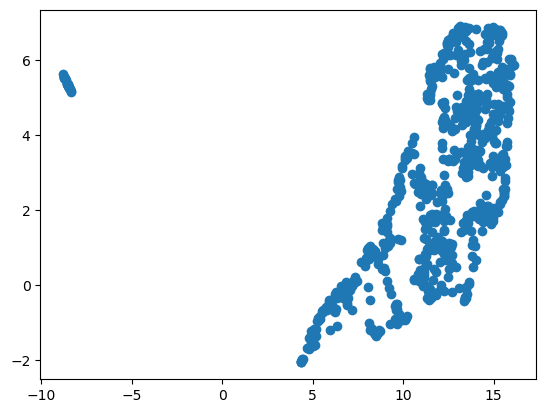

In [1058]:


import umap

# # handle nan values
feature_data = np.nan_to_num(feature_data)

# fit umap on feature_columns
umap_model = umap.UMAP(n_components=2)
umap_model.fit(feature_data)

# transform the data
umap_result = umap_model.transform(feature_data)
plt.scatter(umap_result[:, 0], umap_result[:, 1])










100%|██████████| 9/9 [00:03<00:00,  2.69it/s]


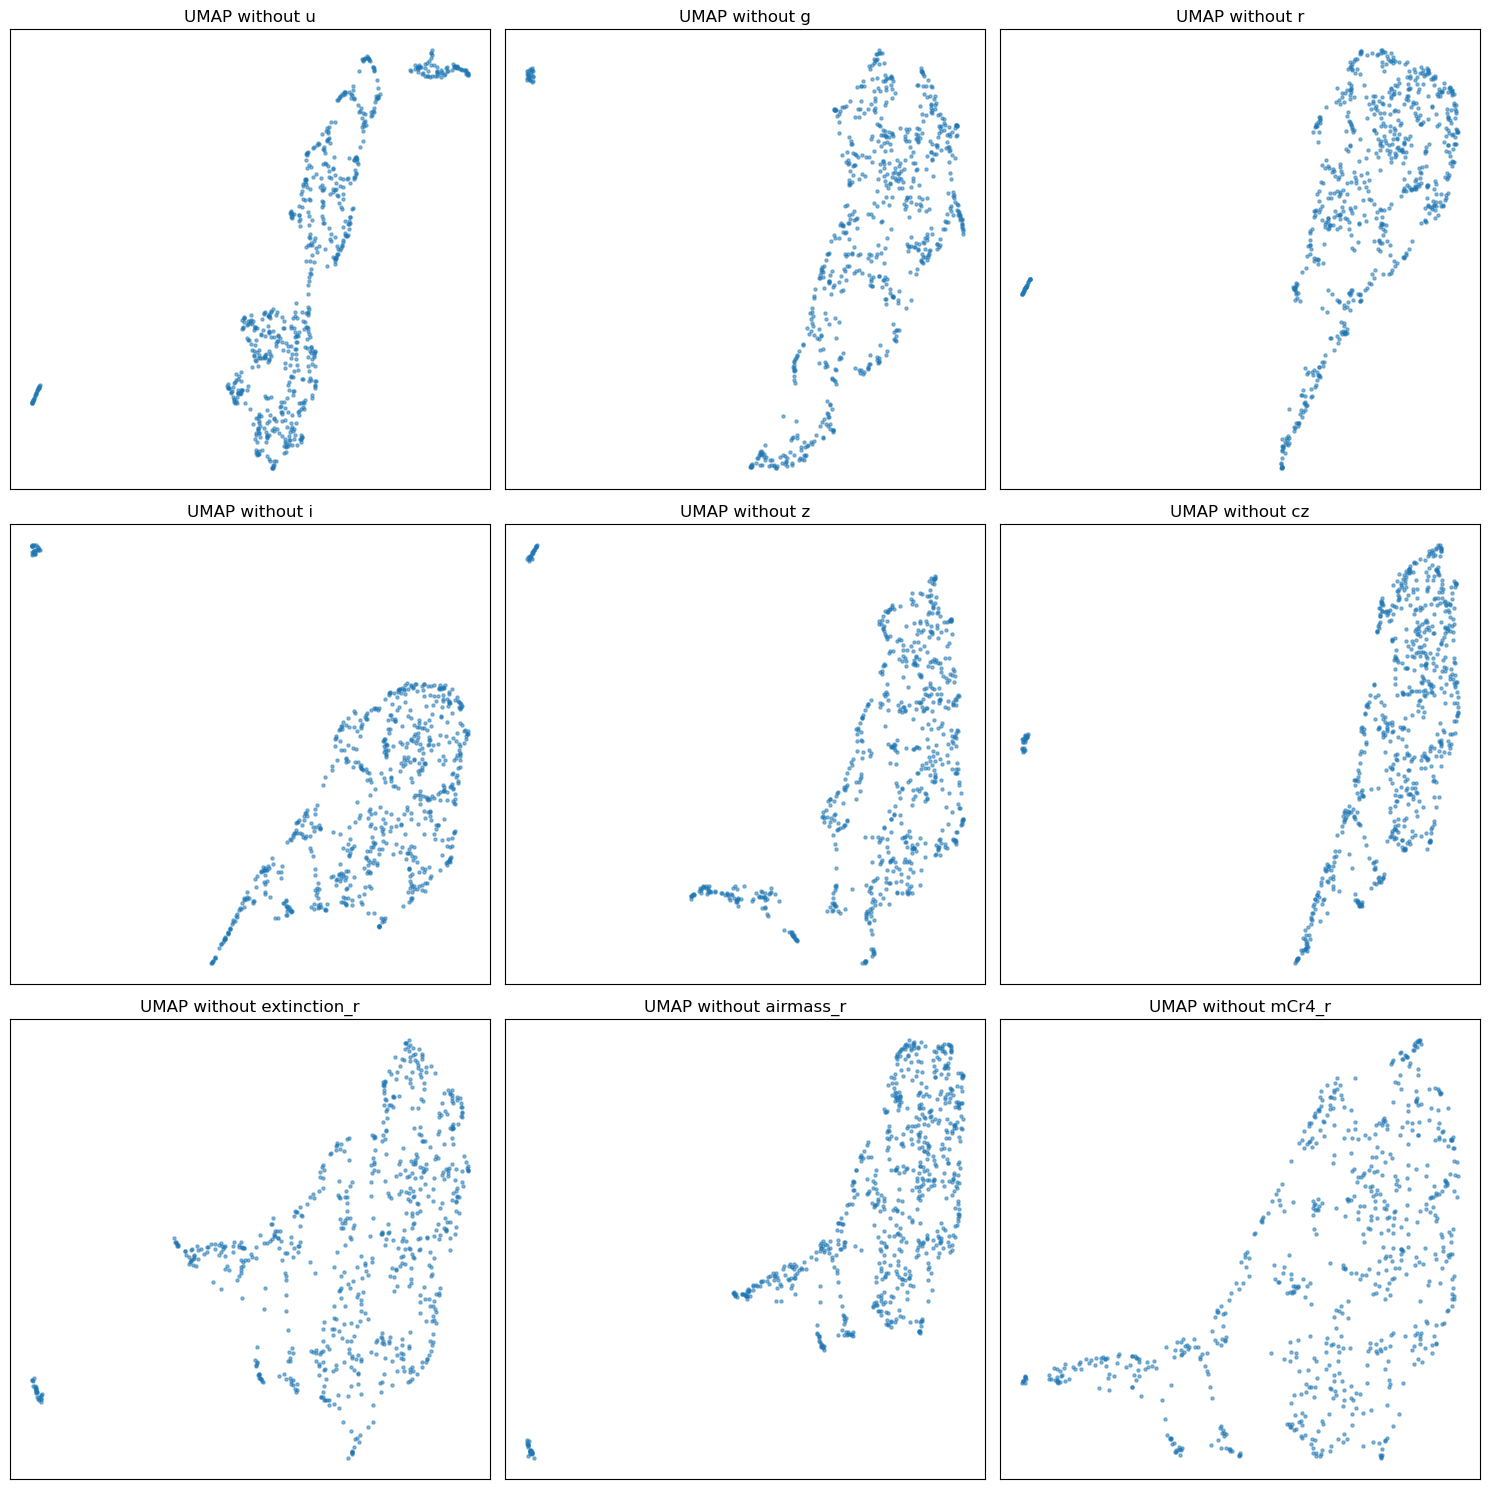

In [1059]:
# For each column in features, omit that column and show a umap
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Get the feature columns
feature_cols = feature_columns.copy()

# Create a figure with multiple subplots
num_features = len(feature_cols)
rows = int(np.ceil(num_features / 3))
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
axes = axes.flatten()

# For each feature, create a UMAP without that feature
for i, col in enumerate(tqdm(feature_cols)):
    # Create a copy of the feature data without the current column
    col_idx = feature_columns.index(col)
    feature_data_without_col = np.delete(feature_data, col_idx, axis=1)
    
    # Handle NaN values
    feature_data_without_col = np.nan_to_num(feature_data_without_col)
    
    # Fit UMAP on the data without this column
    umap_model = umap.UMAP(n_components=2, min_dist=0.1)
    umap_result_without_col = umap_model.fit_transform(feature_data_without_col)
    
    # Plot the result
    axes[i].scatter(umap_result_without_col[:, 0], umap_result_without_col[:, 1], s=5, alpha=0.5)
    axes[i].set_title(f'UMAP without {col}')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [1060]:
# Cluster the data using kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(umap_result)

# Add the cluster labels to the features dataframe
features['cluster'] = kmeans.labels_


MainProcess 2025-03-30 17:32:39,330 WARNING: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


MainProcess 2025-03-30 17:32:39,342 WARNING: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
MainProcess 2025-03-30 17:32:39,343 WARNING: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


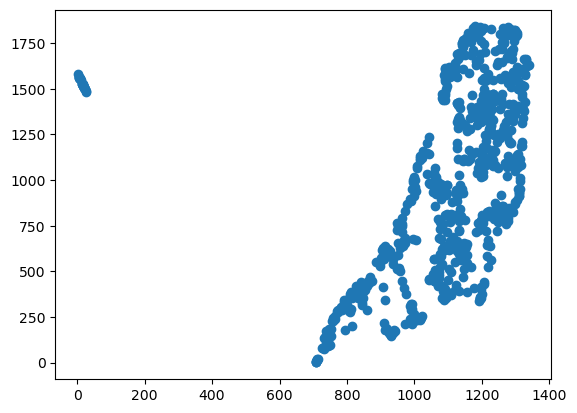

In [1061]:
# X range,
x_range = features["X_centroid"].min(), features["X_centroid"].max()
y_range = features["Y_centroid"].min(), features["Y_centroid"].max()
# Scale umap_result to x_range and y_range
umap_result = (umap_result - umap_result.min(axis=0)) / (umap_result.max(axis=0) - umap_result.min(axis=0))
umap_result[:, 0] = 0.9* umap_result[:, 0] * (x_range[1] - x_range[0]) + x_range[0]
umap_result[:, 1] = 0.9 *umap_result[:, 1] * (y_range[1] - y_range[0]) + y_range[0]


plt.scatter(umap_result[:, 0], umap_result[:, 1])

features['UMAP_X'] = umap_result[:, 0]
features['UMAP_Y'] = umap_result[:, 1]
# save
features.to_csv('/Users/swarchol/Research/seal/data/astro/updated_astro.csv', index=False)









In [1062]:
image_array = image_array * 65535
image_array = image_array.astype(np.uint16)
# SCALE values to 0-65535
image_array = image_array.astype(np.uint16)
# convert image_array to dask array
image_array = da.from_array(image_array)
# make this a uint16 array

In [1063]:
palom.pyramid.write_pyramid(
    mosaics=[
        image_array
    ],
    output_path=r"/Users/swarchol/Research/seal/data/astro/astro.ome.tif", 
    downscale_factor=2,
    channel_names=['u', 'g', 'r', 'i', 'z']
)

2025-03-30 17:32:39.636 | INFO     | palom.pyramid:write_pyramid:166 - Writing to /Users/swarchol/Research/seal/data/astro/astro.ome.tif


Assembling mosaic  1/ 1 (channel  1/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  2/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  3/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  4/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  5/ 5):   0%|          | 0/2 [00:00<?, ?it/s]

2025-03-30 17:32:39.741 | INFO     | palom.pyramid:write_pyramid:182 - Generating pyramid
2025-03-30 17:32:39.741 | INFO     | palom.pyramid:write_pyramid:185 -     Level 1 (1024 x 745)
Processing channel: 100%|##########| 5/5 [00:01<00:00,  4.55it/s]


In [1064]:
# Write 
image_array

dask.array<array, shape=(5, 2048, 1489), dtype=uint16, chunksize=(5, 2048, 1489), chunktype=numpy.ndarray>

In [1065]:
np.max(image_array.compute())

65535

In [1066]:
from ome_types import from_tiff
from tifffile import tiffcomment

file_name= r"/Users/swarchol/Research/seal/data/astro/astro.ome.tif"
xml = from_tiff(file_name)
channel_names = ['u', 'g', 'r', 'i', 'z']
for i in range(len(xml.images[0].pixels.channels)):
    # 
    xml.images[0].pixels.channels[i].name = channel_names[i]

# write this back to the ome-tiff file
ome_xml = xml.to_xml()
# TIFF strings must be 7-bit ASCII
ome_xml = ome_xml.encode('utf-8')
tiffcomment(file_name, ome_xml)



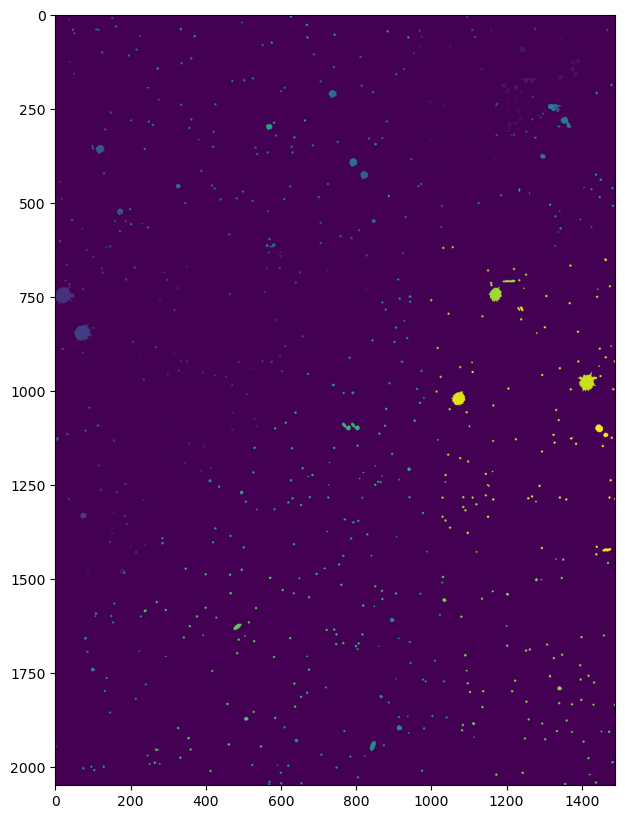

In [1067]:
# show seg_masks as a 2d image as figsize 20,20
plt.figure(figsize=(10, 10))
plt.imshow(seg_masks)
plt.show()


In [1068]:
seg_mask_da = da.from_array(seg_masks)
# write this to a tiff file with palom
palom.pyramid.write_pyramid(
    mosaics=[
        seg_mask_da
    ],
    is_mask=True,
    output_path=r"/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif", 
    downscale_factor=2,

)

2025-03-30 17:32:41.219 | INFO     | palom.pyramid:write_pyramid:166 - Writing to /Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif


Assembling mosaic  1/ 1 (channel  1/ 1):   0%|          | 0/2 [00:00<?, ?it/s]

2025-03-30 17:32:41.283 | INFO     | palom.pyramid:write_pyramid:182 - Generating pyramid
2025-03-30 17:32:41.283 | INFO     | palom.pyramid:write_pyramid:185 -     Level 1 (1024 x 745)
Processing channel: 100%|##########| 1/1 [00:00<00:00,  4.93it/s]


In [1069]:
t1 = palom.reader.OmePyramidReader(r"/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif")
t1.pyramid

[dask.array<reshape, shape=(1, 2048, 1489), dtype=int32, chunksize=(1, 2048, 1489), chunktype=numpy.ndarray>,
 dask.array<reshape, shape=(1, 1024, 745), dtype=int32, chunksize=(1, 1024, 745), chunktype=numpy.ndarray>]

In [1070]:
t2 = palom.reader.OmePyramidReader(r"/Users/swarchol/Research/seal/data/astro/astro.ome.tif")
t2.pyramid

[dask.array<from-zarr, shape=(5, 2048, 1489), dtype=uint16, chunksize=(1, 2048, 1489), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(5, 1024, 745), dtype=uint16, chunksize=(1, 1024, 745), chunktype=numpy.ndarray>]

In [1071]:
image_path = "/Users/swarchol/Research/seal/data/astro/astro.ome.tif"

# segmentation_path = "/mnt/c/Users/simon/Documents/Greg/for_simon/segmentation_mask/WD-76845-097.tif"
segmentation_path = r"/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif"
# csv_path = "/mnt/c/Users/simon/Documents/Greg/for_simon/unmicst-WD-76845-097_cellRing.csv"
csv_path = "/Users/swarchol/Research/seal/data/astro/updated_astro.csv"
dest_path = "/Users/swarchol/Research/seal/data/astro/cut"

In [1072]:
img = (tf.TiffFile(image_path, is_ome=False))

In [1073]:
# remove existing cut directory
if os.path.exists(dest_path):
    shutil.rmtree(dest_path)
for i in tqdm(range(len(img.pages))):
    sample_path = f"{dest_path}/channel_{i}"
    args = [image_path,
    segmentation_path,
    csv_path,
    sample_path,
    "-p", "8",  # Number of processes
        "--channels", (str(i+1)),  # Specific channels to include
        "--cache-size", str(1024 * 1024 * 1024 * 4),  # Cache size
    ]
    cellcutter.cli.cut(args)
    
    
# Now Create the Mask
sample_path = f"{dest_path}/mask"
args = [image_path,
segmentation_path,
csv_path,
sample_path,
"-p", "8",  # Number of processes
    "--channels", (str(i+1)),  # Specific channels to include
    "--cache-size", str(1024 * 1024 * 1024 * 4),  # Cache size
    "--mask-cells"
    
]
cellcutter.cli.cut(args)
# Remove the mask directory but keep mask_mask
import shutil
shutil.rmtree(f"{dest_path}/mask")
shutil.move(f"{dest_path}/mask_mask", f"{dest_path}/mask")
paths_list = [f"{dest_path}/channel_{i}" for i in range(len(img.pages))]
zarr_list = [zarr.open(path) for path in paths_list]
# remove existing combined zarr
if os.path.exists(dest_path + "/combined"):
    shutil.rmtree(dest_path + "/combined")
combined_store = zarr.DirectoryStore(dest_path + "/combined")# [r.chunks for r in zarr_list]
combined = zarr.create(
            store=combined_store,
            overwrite=True,
            shape=(len(zarr_list), zarr_list[0].shape[1],zarr_list[0].shape[2],zarr_list[0].shape[3]),
            dtype=zarr_list[0].dtype,
            compressor=Blosc(cname="zstd", clevel=2, shuffle=Blosc.SHUFFLE)        )

for i in tqdm(range(len(zarr_list))):
    combined[i,:,:,:] = zarr_list[i][0]


# Remove the individual channel zarrs
for path in paths_list:
    shutil.rmtree(path)

  0%|          | 0/5 [00:00<?, ?it/s]MainProcess 2025-03-30 17:32:41,584 INFO: Namespace(p=8, z=False, force=False, window_size=None, mask_cells=False, channels=[1], cache_size=4294967296, chunk_size=32, cells_per_chunk=None, IMAGE='/Users/swarchol/Research/seal/data/astro/astro.ome.tif', SEGMENTATION_MASK='/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif', CELL_DATA='/Users/swarchol/Research/seal/data/astro/updated_astro.csv', DESTINATION='/Users/swarchol/Research/seal/data/astro/cut/channel_0')
MainProcess 2025-03-30 17:32:41,589 INFO: Loading cell data
MainProcess 2025-03-30 17:32:41,606 INFO: Check if all cell IDs from the CSV are represented in the segmentation mask
MainProcess 2025-03-30 17:32:41,613 INFO: Remove cells from segmentation mask that are not present in the CSV
MainProcess 2025-03-30 17:32:41,619 INFO: Finding window size
MainProcess 2025-03-30 17:32:41,634 INFO: Window size automatically set to (53, 53)
MainProcess 2025-03-30 17:32:41,635 INFO: Found 

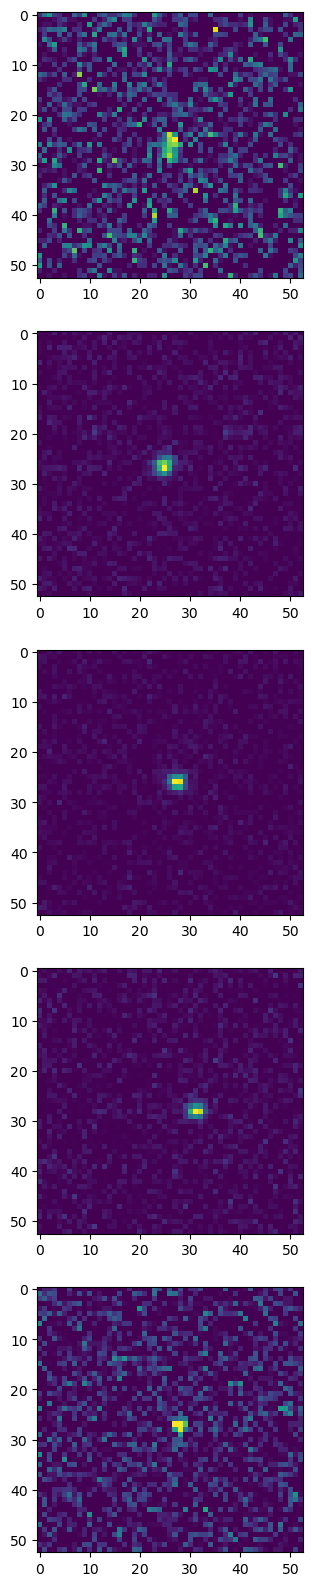

In [1074]:
# this is (5, 619, 53, 53) , plot a random cell, 5 channels as subplots
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
for i in range(5):
    axs[i].imshow(combined[i, 12, :, :])
plt.show()


In [1075]:
# Generate New Images
TILE_SIZE = 1024
DOWNSCALE_FACTOR = 2
MAX_PYRAMID_IMG_SIZE = 1024
from scipy.spatial import cKDTree
from tqdm import tqdm
import tifffile
from loguru import logger
import math
import tempfile
import shutil
SEGMENTATION_PATH = "/Users/swarchol/Research/seal/data/astro/astro_seg_masks.ome.tif"
CSV_PATH = "/Users/swarchol/Research/seal/data/astro/updated_astro.csv"
IMAGE_PATH = "/Users/swarchol/Research/seal/data/astro/astro.ome.tif"
IM_STORE = zarr.DirectoryStore('~/imstor')
SEG_STORE = zarr.DirectoryStore('~/segstor')
CUT_SEG_CELLS_PATH = "/Users/swarchol/Research/seal/data/astro/cut/mask"
CUT_CELLS_PATH = "/Users/swarchol/Research/seal/data/astro/cut/combined"
OUTPUT_TIFF_PATH = "/Users/swarchol/Research/seal/data/astro/tiled.ome.tif"
OUTPUT_SEGMENTATION_PATH = "/Users/swarchol/Research/seal/data/astro/tiled-mask.ome.tif"
CSV_WRITE_PATH = "/Users/swarchol/Research/seal/data/astro/updated_astro.csv"


In [1076]:




def create_non_occlusive_zarr(
    im_zarr_tiled,seg_zarr_tiled, cut_cells, cut_masks, csv_df
):
    # Create list of all indices of cells in cut_cells
    cell_indices = np.arange(cut_masks.shape[0])
    np.random.seed(0)
    np.random.shuffle(cell_indices)
    for z in tqdm(range(len(im_zarr_tiled))):
        height, width = im_zarr_tiled[z].shape[-2:]
        scale_factor = 2**z

        # Pre-allocate the entire level
        seg_level_data = zarr.zeros((height, width), dtype=np.uint32)
        image_level_data = zarr.zeros(
            (im_zarr_tiled[z].shape[0], height, width), dtype=np.uint16
        )
        binary_mask = np.zeros((height, width), dtype=np.uint8)

        for cell_index in tqdm(cell_indices):
            # Retrieve cell row
            cell_row = csv_df.loc[csv_df["CellID"] == cell_index]
            if cell_row.empty:
                continue
            cell_location = cell_row[["UMAP_X", "UMAP_Y"]].values.flatten()

            # Adjust cell_location to place the cell's center at the centroid
            cell_center_offset = (cut_masks.shape[-2] // 2, cut_masks.shape[-1] // 2)
            cell_location = ((cell_location / scale_factor) - cell_center_offset).astype(int)
            
            # Ensure cell_location does not go below 0
            cell_location = np.maximum(cell_location, 0)

            cell_x_range = min(cell_location[0] + cut_masks.shape[-2], width)
            cell_y_range = min(cell_location[1] + cut_masks.shape[-1], height)

            # Calculate slicing based on truncated ranges
            cell_slice_x = slice(cell_location[0], cell_x_range)
            cell_slice_y = slice(cell_location[1], cell_y_range)
            cut_cell_slice_x = slice(0, cell_x_range - cell_location[0])
            cut_cell_slice_y = slice(0, cell_y_range - cell_location[1])

            # Check if adding this cell to the binary mask will create a value over 1
            binary_check = (
                binary_mask[cell_slice_y, cell_slice_x]
                + cut_masks[cell_index, cut_cell_slice_y, cut_cell_slice_x]
            )
            if np.any(binary_check > 1):
                continue
            binary_mask[cell_slice_y, cell_slice_x] = binary_check

            seg_level_data[cell_slice_y, cell_slice_x] += (
                cut_masks[cell_index][cut_cell_slice_y, cut_cell_slice_x]
                * (cell_row["CellID"].values[0])
            ).astype(np.uint32)
            masked_cell = cut_masks[cell_index] * cut_cells[:, cell_index, :, :]
            image_level_data[:, cell_slice_y, cell_slice_x] += masked_cell[
                :, cut_cell_slice_y, cut_cell_slice_x
            ]

        im_zarr_tiled[z] = image_level_data
        seg_zarr_tiled[z] = seg_level_data
    return im_zarr_tiled, seg_zarr_tiled



In [1077]:
# Load data
imgio = tifffile.TiffFile(IMAGE_PATH, is_ome=False)
im_zarr = zarr.open(imgio.series[0].aszarr())

segio = tifffile.TiffFile(SEGMENTATION_PATH, is_ome=False)
seg_zarr = zarr.open(segio.series[0].aszarr())

# Create temporary directories for Zarr stores

zarr.convenience.copy_store(im_zarr.store, IM_STORE, if_exists="replace")
zarr.convenience.copy_store(seg_zarr.store, SEG_STORE, if_exists="replace")

im_zarr_tiled = zarr.open(IM_STORE)
seg_zarr_tiled = zarr.open(SEG_STORE)

# if .parquet file is used, use pd.read_parquet instead
if CSV_PATH.endswith(".parquet"):
    csv_df = pd.read_parquet(CSV_PATH)
else:
    csv_df = pd.read_csv(CSV_PATH)
try:
    embedding = csv_df[["UMAP_X", "UMAP_Y"]].values
except:
    embedding = csv_df[["emb1", "emb2"]].values

embedding[:, 0] -= embedding[:, 0].min()
embedding[:, 1] -= embedding[:, 1].min()
embedding[:, 0] = embedding[:, 0] / embedding[:, 0].max()
embedding[:, 1] = embedding[:, 1] / embedding[:, 1].max()
embedding[:, 0] = embedding[:, 0] * im_zarr_tiled[0].shape[-1]
embedding[:, 1] = embedding[:, 1] * im_zarr_tiled[0].shape[-2]
csv_df["UMAP_X"] = embedding[:, 0]
csv_df["UMAP_Y"] = embedding[:, 1]
# Write embedding to csv
csv_df.to_csv(CSV_WRITE_PATH, index=False)
print(csv_df.shape)
tree = cKDTree(embedding)
# print(im_zarr_tiled[0].shape[-2:])

# Load cut cells
cut_seg_cells = zarr.open(CUT_SEG_CELLS_PATH)
cut_cells = zarr.open(CUT_CELLS_PATH)
# # # Process segmentation
im_zarr_tiled,seg_zarr_tiled = create_non_occlusive_zarr(
    im_zarr_tiled,seg_zarr_tiled, cut_cells, cut_seg_cells, csv_df
)


(708, 534)


100%|██████████| 3/3 [00:17<00:00,  5.79s/it]


In [1078]:
csv_df.columns


Index(['objid', 'RUN', 'RERUN', 'CAMCOL', 'FIELD', 'ID', 'type', 'RA', 'DEC',
       'u',
       ...
       'TAI_g', 'TAI_r', 'TAI_i', 'TAI_z', 'CellID', 'X_centroid',
       'Y_centroid', 'cluster', 'UMAP_X', 'UMAP_Y'],
      dtype='object', length=534)

In [1079]:
import dask
dask.array.from_zarr(im_zarr_tiled[0])

dask.array<from-zarr, shape=(5, 2048, 1489), dtype=uint16, chunksize=(2, 512, 373), chunktype=numpy.ndarray>

In [1080]:
seg_mask_da = da.from_array(seg_masks)
# write this to a tiff file with palom
palom.pyramid.write_pyramid(
    mosaics=[
        dask.array.from_zarr(im_zarr_tiled[0])
    ],
    # is_mask=True,
    output_path=r"/Users/swarchol/Research/seal/data/astro/hybrid.ome.tif", 
        downscale_factor=2,

)

2025-03-30 17:33:04.917 | INFO     | palom.pyramid:write_pyramid:166 - Writing to /Users/swarchol/Research/seal/data/astro/hybrid.ome.tif


Assembling mosaic  1/ 1 (channel  1/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  2/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  3/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  4/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

Assembling mosaic  1/ 1 (channel  5/ 5):   0%|          | 0/32 [00:00<?, ?it/s]

2025-03-30 17:33:05.056 | INFO     | palom.pyramid:write_pyramid:182 - Generating pyramid
2025-03-30 17:33:05.056 | INFO     | palom.pyramid:write_pyramid:185 -     Level 1 (1024 x 745)
Processing channel: 100%|##########| 5/5 [00:01<00:00,  4.59it/s]


In [1081]:
seg_mask_da = da.from_array(seg_masks)
# write this to a tiff file with palom
palom.pyramid.write_pyramid(
    mosaics=[
        dask.array.from_zarr(seg_zarr_tiled[0])
    ],
    is_mask=True,
    output_path=r"/Users/swarchol/Research/seal/data/astro/hybrid.mask.ome.tif", 
        downscale_factor=2,

)

2025-03-30 17:33:06.166 | INFO     | palom.pyramid:write_pyramid:166 - Writing to /Users/swarchol/Research/seal/data/astro/hybrid.mask.ome.tif


Assembling mosaic  1/ 1 (channel  1/ 1):   0%|          | 0/32 [00:00<?, ?it/s]

2025-03-30 17:33:06.219 | INFO     | palom.pyramid:write_pyramid:182 - Generating pyramid
2025-03-30 17:33:06.219 | INFO     | palom.pyramid:write_pyramid:185 -     Level 1 (1024 x 745)
Processing channel: 100%|##########| 1/1 [00:00<00:00,  5.02it/s]


In [1082]:
from ome_types import from_tiff
from tifffile import tiffcomment

file_name= r"/Users/swarchol/Research/seal/data/astro/hybrid.ome.tif"
xml = from_tiff(file_name)
channel_names = ['u', 'g', 'r', 'i', 'z']
for i in range(len(xml.images[0].pixels.channels)):
    # 
    xml.images[0].pixels.channels[i].name = channel_names[i]

# write this back to the ome-tiff file
ome_xml = xml.to_xml()
# TIFF strings must be 7-bit ASCII
ome_xml = ome_xml.encode('utf-8')
tiffcomment(file_name, ome_xml)

## Compute Shap Values


In [1083]:
csv_df = pd.read_csv(CSV_WRITE_PATH)
csv_df

,objid,RUN,RERUN,CAMCOL,FIELD,ID,type,RA,DEC,u,...,TAI_g,TAI_r,TAI_i,TAI_z,CellID,X_centroid,Y_centroid,cluster,UMAP_X,UMAP_Y
0,1.240000e+18,2708,301,1,234,22,6,18.752891,-0.978412,18.18845,...,4512258771,4512258484,4512258556,4512258699,150,75.030612,1331.153061,0,806.724716,88.802469
1,1.240000e+18,2708,301,1,234,36,3,18.748518,-0.973636,14.58587,...,4512258769,4512258483,4512258554,4512258698,138,36.000000,1287.000000,2,6.099007,1732.027028
2,1.240000e+18,2708,301,1,234,53,3,18.745173,-0.956080,24.63399,...,4512258769,4512258482,4512258554,4512258697,216,4.945205,1127.273973,0,1012.307818,667.768969
3,1.240000e+18,2708,301,1,234,57,3,18.748183,-0.954625,24.63132,...,4512258770,4512258483,4512258555,4512258698,154,32.641026,1114.487179,1,1117.899411,1046.984465
4,1.240000e+18,2708,301,1,234,70,6,18.747031,-0.913746,15.86924,...,4512258770,4512258483,4512258554,4512258698,117,21.531186,744.499657,0,788.266873,8.180950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,1.240000e+18,4858,301,1,481,623,3,18.907381,-0.929053,23.91156,...,4602733446,4602733159,4602733231,4602733374,777,1478.500000,880.214286,4,1337.018884,1631.230596
704,1.240000e+18,4858,301,1,481,624,6,18.907897,-0.941584,25.81512,...,4602733447,4602733160,4602733232,4602733375,806,1484.000000,995.000000,3,1478.494077,1756.774417
705,1.240000e+18,4858,301,1,481,625,6,18.908402,-0.973699,24.86380,...,4602733447,4602733160,4602733232,4602733376,832,1487.363636,1287.000000,3,1484.029646,1806.797133
706,1.240000e+18,4858,301,1,481,890,3,18.902960,-0.989798,22.23417,...,4602733447,4602733160,4602733232,4602733376,826,1439.000000,1434.000000,1,1189.065317,560.414280


In [1084]:
# feature_columns = ['u', 'g', 'r', 'i', 'z']

In [1085]:
columns = csv_df.columns
columns
feature_data = csv_df[feature_columns].to_numpy()

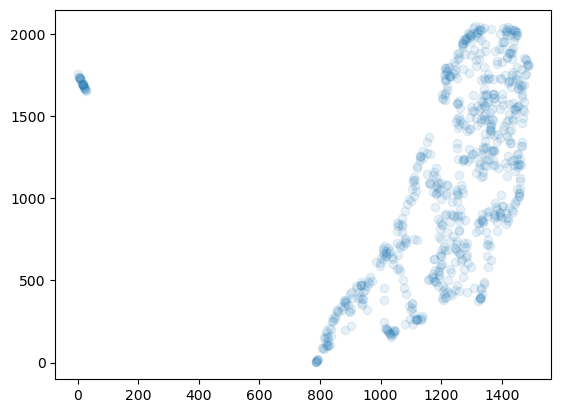

In [1086]:
# # plt.scatter(csv_df['UMAP_X'], csv_df['UMAP_Y'])
regressor = xgb.XGBRegressor(
                 n_estimators=100,
                 max_depth=6)

regressor.fit(feature_data, csv_df[['UMAP_X','UMAP_Y']])
xgb_preds = regressor.predict(feature_data)
plt.scatter(xgb_preds[:,0], xgb_preds[:,1], alpha=0.1)
explainer = shap.Explainer(regressor)
shap_values = explainer(feature_data)




In [1087]:
shap_values = np.abs(shap_values.values)
alphabetical_features = sorted(feature_columns)
indices = [feature_columns.index(feature) for feature in alphabetical_features]
indices
# shap_values = shap_values[:, alphabetical_features]
alphabetical_shap_values = shap_values[:, indices]
np.save('/Users/swarchol/Research/seal/data/astro.shap.npy', alphabetical_shap_values)

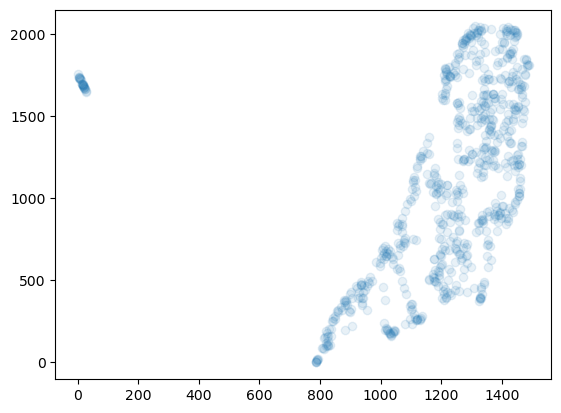

In [1088]:

points = csv_df[['UMAP_X', 'UMAP_Y']]

# plot the points
plt.scatter(points['UMAP_X'], points['UMAP_Y'], alpha=0.1)
plt.show()






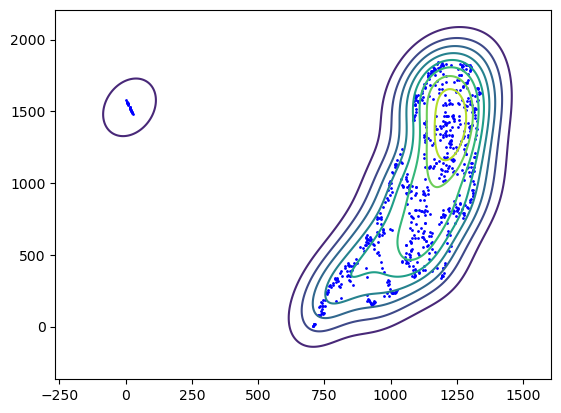

In [1089]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st

# data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 400)
x = features['UMAP_X']
y = features['UMAP_Y']
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

# Expand the area to ensure contours are complete
xmin_expanded = xmin - (xmax - xmin) * 0.2  # 10% expansion on both sides
xmax_expanded = xmax + (xmax - xmin) * 0.2
ymin_expanded = ymin - (ymax - ymin) * 0.2
ymax_expanded = ymax + (ymax - ymin) * 0.2

# Peform the kernel density estimate with expanded area
xx, yy = np.mgrid[xmin_expanded:xmax_expanded:1024j, ymin_expanded:ymax_expanded:1024j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
import matplotlib.contour as mcontour
fig, ax = plt.subplots()
contours = ax.contour(xx, yy, f, filled=False, levels=np.linspace(f.min(), f.max(), 10))
# plot the scatterplot of the points
plt.scatter(x, y, c='blue', s=1)
contour_lines = []
contours.allsegs
for seg in contours.allsegs:
    for line in seg:
        contour_lines.append(line.tolist())


In [1090]:
from shapely.geometry import Point, Polygon, MultiPoint
import numpy as np
from tqdm import tqdm

# Convert the points DataFrame into a NumPy array for efficient processing
point_coords = points[['UMAP_X', 'UMAP_Y']].values
multipoints = MultiPoint(point_coords)

# Preallocate the list
points_in_contours = np.zeros(len(contour_lines), dtype=int)

for i, contour in enumerate(tqdm(contour_lines)):
    if len(contour) < 4:
        continue  # Skip small contours

    polygon = Polygon(contour)
    
    # Efficiently check which points are inside the polygon
    points_in_contours[i] = sum(polygon.contains(Point(x, y)) for x, y in point_coords)

# Convert back to list if needed
points_in_contours = points_in_contours.tolist()

100%|██████████| 11/11 [00:00<00:00, 111.67it/s]


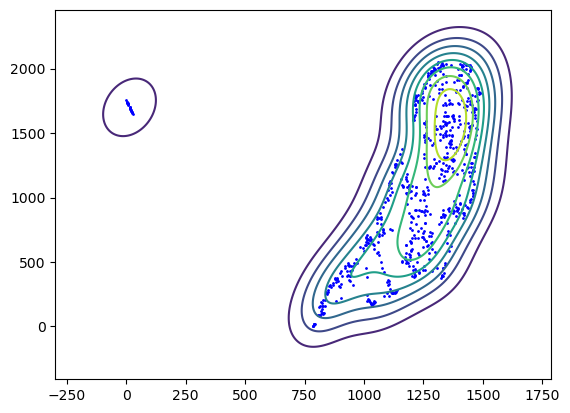

In [1091]:
import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st

# data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 400)
x = csv_df['UMAP_X']
y = csv_df['UMAP_Y']
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()

# Expand the area to ensure contours are complete
xmin_expanded = xmin - (xmax - xmin) * 0.2  # 10% expansion on both sides
xmax_expanded = xmax + (xmax - xmin) * 0.2
ymin_expanded = ymin - (ymax - ymin) * 0.2
ymax_expanded = ymax + (ymax - ymin) * 0.2

# Peform the kernel density estimate with expanded area
xx, yy = np.mgrid[xmin_expanded:xmax_expanded:1024j, ymin_expanded:ymax_expanded:1024j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
import matplotlib.contour as mcontour
fig, ax = plt.subplots()
contours = ax.contour(xx, yy, f, filled=False, levels=np.linspace(f.min(), f.max(), 10))
# plot the scatterplot of the points
plt.scatter(x, y, c='blue', s=1)
contour_lines = []
contours.allsegs
for seg in contours.allsegs:
    for line in seg:
        contour_lines.append(line.tolist())

# Pickle the contour_lines
with open('/Users/swarchol/Research/seal/data/astro.contour.pkl', 'wb') as f:
    pickle.dump(contour_lines, f)
